In [1]:
from transformers import BertForSequenceClassification, BertTokenizer

# import fine-tuned model and tokenizer
model_path = '../models/bert-base-uncased-finetuned-tweets'
model = BertForSequenceClassification.from_pretrained(model_path, output_attentions=True)
tokenizer = BertTokenizer.from_pretrained(model_path)

2022-04-22 07:54:46.990905: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [4]:
def tokenize_fn(input_text_list):
    # tokenize input
    input_text_str = " ".join(input_text_list)
    tokenized_input = tokenizer.encode_plus(
        input_text_list, return_tensors="pt", truncation=True, is_split_into_words=True
    )  # truncated to 512 tokens
    input_ids = tokenized_input["input_ids"]
    token_type_ids = tokenized_input["token_type_ids"]
    input_id_list = input_ids[0].tolist()
    tokens = tokenizer.convert_ids_to_tokens(input_id_list)
    return tokens

In [5]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('/workspace/data/tweet-sentiment-extraction/train_for_fine_tune.csv')

lens = []
for i in tqdm(range(len(df))):
    example = df['text'][i].split()
    tok = tokenize_fn(example)
    lens.append(len(tok))


100%|██████████| 27480/27480 [00:24<00:00, 1126.20it/s]


110
3


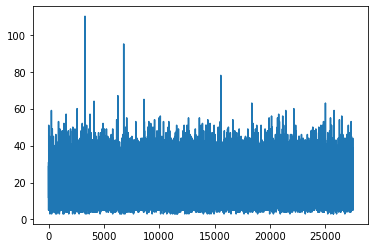

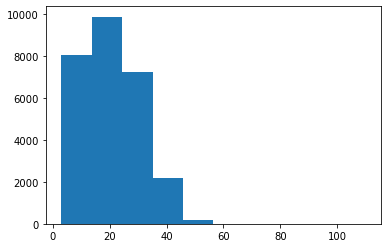

In [6]:
import matplotlib.pyplot as plt
print(max(lens))
print(min(lens))
plt.plot(lens)
plt.show()
plt.hist(lens)
plt.show()

In [7]:
df['text'].duplicated().any()

False

In [8]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('/workspace/data/tweet-sentiment-extraction/test_for_fine_tune.csv')

lens = []
for i in tqdm(range(len(df))):
    example = df['text'][i].split()
    tok = tokenize_fn(example)
    lens.append(len(tok))

100%|██████████| 3534/3534 [00:03<00:00, 1056.84it/s]


70
3


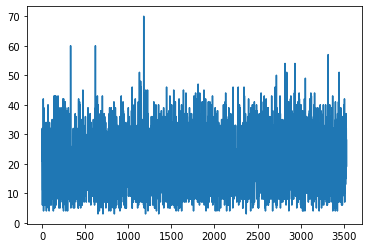

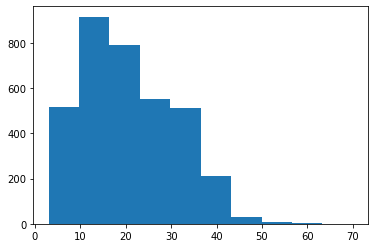

In [9]:
import matplotlib.pyplot as plt
print(max(lens))
print(min(lens))
plt.plot(lens)
plt.show()
plt.hist(lens)
plt.show()